# O Campeonato Brasileiro está ficando mais injusto? (Update: 21/Mar/21)
### Uma análise exploratória usando o Coeficiente de Gini  


## Introdução

O Flamengo terminou como campeão do Campeonato Brasileiro 2020, e por mais uma vez vamos novamente realizar a mesma pergunta que iniciei no meu post que indaga: 

### O Campeonato Brasileiro está ficando mais injusto?
[Análise até o Brasileirão 2018](https://flavioclesio.com/o-campeonato-brasileiro-esta-ficando-mais-injusto)  

[Análise até o Brasileirão 2019](https://flavioclesio.com/o-campeonato-brasileiro-esta-ficando-mais-injusto-update-final)  


Mais uma vez fui na Wikipedia, e atualizei os dados já incluindo o ano de 2020. 



## A desigualdade estrutural no Campeonato Brasileiro é uma tendência?

Nas análises dos anos de [2018](https://flavioclesio.com/o-campeonato-brasileiro-esta-ficando-mais-injusto) e [2019](https://flavioclesio.com/o-campeonato-brasileiro-esta-ficando-mais-injusto-update-final) eu cheguei a conclusão de que "**Sim. Com o uso do Coeficiente de Gini como métrica para mensurar se há uma desigualdade estrutural mostrou que existem sim elementos latentes dessa desigualdade**".

Diferentemente da [campanha avassaladora de 2019](https://twitter.com/tiagotvv/status/1203809611821780992) esse ano o campeonato terminou com o Inter e o Flamengo disputando até o último jogo o que certamente trouxe um pouco mais de emoção para aqueles que estavam disputando o título. 

Outro aspecto a ser considerado é que se em 2019 [uma estratégia apenas de empates seria o suficiente para salvar um time do rebaixamento](https://twitter.com/tiagotvv/status/1203819653149155329), isso não seria possível para o ano de 2020.  


Essas duas situações podem indicar que um princípio de desigualdade da distribuição final dos pontos pode estar sendo reduzida. É o que vamos tentar ver a seguir. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%pylab inline
plt.style.use('fivethirtyeight')

df_brasileirao = pd.read_csv('dataset-2003-2020.csv', delimiter=';')

print(f'Number of Records: {df_brasileirao.shape[0]} - Number of Columns: {df_brasileirao.shape[1]}')

df_brasileirao.tail(20)

Populating the interactive namespace from numpy and matplotlib
Number of Records: 370 - Number of Columns: 12


,year,position,team,points,games,victories,draws,losses,goals_scored,goals_against,goals_difference,perc_points_won
350,2020,1,Flamengo,71,38,21,8,9,68,48,20,62
351,2020,2,Internacional,70,38,20,10,8,61,35,26,61
352,2020,3,Atlético-MG,68,38,20,8,10,64,45,19,60
353,2020,4,São Paulo,66,38,18,12,8,59,41,18,58
354,2020,5,Fluminense,64,38,18,10,10,55,42,13,56
355,2020,6,Grêmio,59,38,14,17,7,53,40,13,52
356,2020,7,Palmeiras,58,38,15,13,10,51,37,14,51
357,2020,8,Santos,54,38,14,12,12,52,51,1,47
358,2020,9,Athletico-PR,53,38,15,8,15,38,36,2,47
359,2020,10,Bragantino,53,38,13,14,11,50,40,10,47


In [2]:
def gini(arr, eps=1e-8):
    '''
    Reference: PyGini (I owe you a beer @o_guest)
    https://github.com/mckib2/pygini/blob/master/pygini/gini.py
    
    Calculate the Gini coefficient of a numpy array.
    Notes
    -----
    Based on bottom eq on [2]_.
    References
    ----------
    .. [2]_ http://www.statsdirect.com/help/
            default.htm#nonparametric_methods/gini.htm
    '''

    # All values are treated equally, arrays must be 1d and > 0:
    arr = np.abs(arr).flatten() + eps

    # Values must be sorted:
    arr = np.sort(arr)

    # Index per array element:
    index = np.arange(1, arr.shape[0]+1)

    # Number of array elements:
    N = arr.shape[0]

    # Gini coefficient:
    return(np.sum((2*index - N - 1)*arr))/(N*np.sum(arr))


def get_gini_df(df):
    """Generate DF with Gini Index

    Parameters
    ----------
    df : Pandas Dataframe
      Dataframe with Brasileirão data

    Returns
    -------
    gini_df : Pandas Dataframe
      Returns a Pandas Dataframe with the year, team and gini index

    """    
    gini_per_year = []
    
    for year in df['year'].unique():
        championship_index = gini(np.array(df[df['year'] == year]['points']))
        champion = (df[(df['year'] == year) & (df['position'] == 1)]['team'])
        gini_per_year.append((year, champion.values[0], round(championship_index, 4)))
        
    gini_df = pd.DataFrame(gini_per_year)
    gini_df.columns = ['year', 'team', 'gini']
    
    # Indexing the date field for graph it smoothly
    gini_df.set_index('year', inplace=True)

    return gini_df

## Ranking de desigualdade entre todas as edições do Brasileirão usando o Coeficiente de Gini

In [3]:
gini_df = get_gini_df(df_brasileirao)
gini_df.sort_values(by=['gini'], ascending=False)

,team,gini
year,,
2019,Flamengo,0.1746
2018,Palmeiras,0.1449
2014,Cruzeiro,0.1413
2020,Flamengo,0.1366
2012,Fluminense,0.1355
2016,Palmeiras,0.1349
2010,Fluminense,0.1318
2006,São Paulo,0.1287
2015,Corinthians,0.1236


Antes de seguir em frente com a nossa análise, vamos recapitular os anos de 2018 e 2019:

#### Até 2018 

- Temos **uma tendência crescente na desigualdade em relação ao número de pontos entre os times dentro do campeonato brasileiro**;  

- Esse crescimento começa de forma **mais substancial em 2010**;  

- As temporadas mais recentes (2018 e 2017) são respectivamente as temporadas com a **maior e a menor desigualdade**;  
- Essa **tendência do aumento da desigualdade ocorre mesmo removendo o campeão e o pior time da temporada**, dado que o campeão nos casos extremos possui uma pequena vantagem em relação ao segundo colocado, e o pior time termina com uma pontuação virtualmente impossível de reverter em uma ocasião de última rodada;  

- Nas temporadas que há uma **desigualdade maior existe vales de pontos entre blocos de times**, no caso que vimos esses vales foram de **7 pontos** (2 vitorias + 1 empate);  

- Nas temporadas **mais iguais esses vales de blocos times** provavelmente são menores ou em alguns casos inexistentes, no caso observado havia somente **um bloco de 4 pontos** (1 vitória + 1 empate) e excluindo este fato não havia nenhuma distância maior do que **1 vitória** por toda a tabela entre posições imediatamente superiores.

#### 2019
- A desigualdade na distribuição dos pontos ficou ainda mais abissal com um aumento de 17% na desigualdade em relação ao numero de pontos conquistados no campeonato imediatamente anterior. 

- O Flamengo finalmente furou a impressionante barreira dos **90 pontos** em campeonato de 20 times; o que é para efeitos de comparação [é o mesmo número de pontos que o Real Madrid e/ou Barcelona fazem em temporadas avassaladoras no Campeonato Espanhol](https://pt.wikipedia.org/wiki/La_Liga_de_2009%E2%80%9310) o que indica que houve uma disparidade muito grande dentro de campo;
   
- Como já colocado acima, uma estratégia de apenas empates (38 pontos) já seria o suficiente para sair do rebaixamento;


#### 2020
- Olhando o coeficiente de gini somente, podemos ver que o campeonato de 2020 mesmo com um numero apertado de times disputando o titulo, ainda sim fica em quarto colocado em relação a campeonatos desiguais, atrás apenas de Cruzeiro/2014, Palmeiras/2018 e Flamengo/2019.


Vamos agora olhar a evolução dessa desigualdade ao longo do tempo, e comparar com as edições anteriores.  

In [4]:
df_brasileirao[df_brasileirao['year'] == 2020]

,year,position,team,points,games,victories,draws,losses,goals_scored,goals_against,goals_difference,perc_points_won
350,2020,1,Flamengo,71,38,21,8,9,68,48,20,62
351,2020,2,Internacional,70,38,20,10,8,61,35,26,61
352,2020,3,Atlético-MG,68,38,20,8,10,64,45,19,60
353,2020,4,São Paulo,66,38,18,12,8,59,41,18,58
354,2020,5,Fluminense,64,38,18,10,10,55,42,13,56
355,2020,6,Grêmio,59,38,14,17,7,53,40,13,52
356,2020,7,Palmeiras,58,38,15,13,10,51,37,14,51
357,2020,8,Santos,54,38,14,12,12,52,51,1,47
358,2020,9,Athletico-PR,53,38,15,8,15,38,36,2,47
359,2020,10,Bragantino,53,38,13,14,11,50,40,10,47


In [5]:
df_brasileirao[df_brasileirao['position'] == 20].describe()

,year,position,points,games,victories,draws,losses,goals_scored,goals_against,perc_points_won
count,18.000000,18.0,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,2011.500000,20.0,31.388889,39.111111,7.333333,9.555556,22.222222,36.000000,65.611111,26.388889
std,5.338539,0.0,9.708328,2.676453,2.828427,2.935026,2.839958,13.137284,9.036780,6.527218
min,2003.000000,20.0,17.000000,38.000000,3.000000,5.000000,17.000000,18.000000,48.000000,15.000000
25%,2007.250000,20.0,27.250000,38.000000,5.500000,8.000000,21.000000,24.500000,58.250000,24.250000
50%,2011.500000,20.0,30.500000,38.000000,7.000000,10.000000,21.000000,37.500000,65.500000,26.500000
75%,2015.750000,20.0,34.250000,38.000000,8.500000,11.000000,23.750000,44.000000,71.750000,29.500000
max,2020.000000,20.0,51.000000,46.000000,13.000000,18.000000,29.000000,62.000000,80.000000,37.000000


Diferentemente dos outros anos que alguns blocos de times na tabela foram bem fáceis de capturar, este ano particularmente não mostrou algo que saltasse os olhos, exceto o Botafogo que foi rebaixado com um dos piores aproveitamentos entre todos os times rebaixados em ultimo lugar com 27 pontos (o Q1 (primeiro quartil) de times rebaixados em ultimo tem  27 pontos).  

De maneira geral ficou assim:
- **Briga pelo titulo**: Flamengo, Internacional e Atletico-MG

- **Barreira dos 60+ pontos para libertadores**: São Paulo, e Fluminense

- **Quem seria rebaixado com o Botafogo**: Sport, Fortaleza, Vasco, Goiás e Curitiba. 

Um ponto interessante é que nos programas esportivos há uma frase que diz que "__time que faz 40 pontos sempre escapa do rebaixamento__". Isso faz sentido dado que o clube que escapou com o menor numero de pontos foi o Ceará/2019.

Contudo, se eu tivesse que definir um novo corte, com certeza seriam os 45 pontos, dado que a mediana dos times que escaparam esses tiveram foi de 44 pontos com o Q4 desses times que escaparam com 45 pontos.  

Apenas para fins de informação o Curitiba/2009 foi o ultimo time que caiu com 45 pontos desde a era dos 20 times nos pontos corridos; sendo que 2009 (Flamengo) foi o terceiro campeonato mais igual da era dos pontos corridos.

In [6]:
df_brasileirao[df_brasileirao['position'] == 16].describe()

,year,position,points,games,victories,draws,losses,goals_scored,goals_against,perc_points_won
count,18.000000,18.0,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,2011.500000,16.0,45.055556,39.111111,11.611111,10.444444,17.055556,46.777778,55.222222,38.388889
std,5.338539,0.0,4.671216,2.676453,1.500545,2.280924,2.208865,9.384315,9.490277,2.199970
min,2003.000000,16.0,39.000000,38.000000,10.000000,6.000000,13.000000,34.000000,41.000000,34.000000
25%,2007.250000,16.0,43.000000,38.000000,11.000000,9.000000,16.250000,39.500000,48.500000,37.250000
50%,2011.500000,16.0,44.000000,38.000000,11.000000,10.500000,17.000000,48.500000,55.000000,38.500000
75%,2015.750000,16.0,45.000000,38.000000,12.000000,11.750000,18.750000,50.750000,61.250000,39.000000
max,2020.000000,16.0,56.000000,46.000000,15.000000,15.000000,20.000000,65.000000,72.000000,43.000000


In [7]:
df_brasileirao[df_brasileirao['position'] == 16]

,year,position,team,points,games,victories,draws,losses,goals_scored,goals_against,goals_difference,perc_points_won
15,2003,16,Vitória,56,46,15,11,20,50,64,–14,40
39,2004,16,Vasco da Gama,54,46,14,12,20,64,68,-4,39
63,2005,16,Figueirense,53,42,14,11,17,65,72,–7,42
85,2006,16,Palmeiras,44,38,12,8,18,58,70,-12,39
105,2007,16,Goiás,45,38,13,6,19,49,62,-13,39
125,2008,16,Náutico,44,38,11,11,16,44,54,–10,38
145,2009,16,Fluminense,46,38,11,13,14,49,56,-7,40
165,2010,16,Atlético Goianiense,42,38,11,9,18,51,57,-6,37
185,2011,16,Cruzeiro,43,38,11,10,17,48,51,-3,37
205,2012,16,Portuguesa,45,38,10,15,13,39,41,–2,39


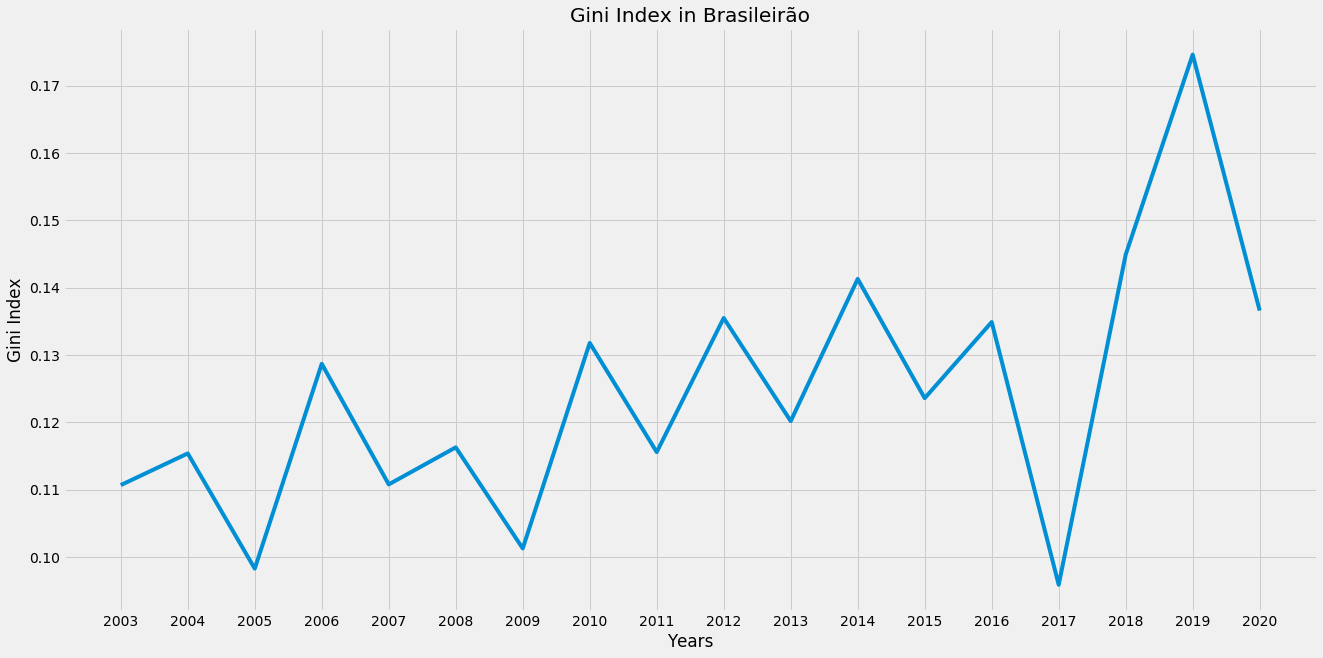

In [8]:
def get_graph_ts(df, column, title, label):
    """Generate graph of a Time Series

    Parameters
    ----------
    df : Pandas Dataframe
      Dataframe with Brasileirão data
    column : string
      Column with the metric to be ploted
    title : string
      Graph title to be displayed
    label : string
      Name of the series that will be placed
      as legend
      
    Returns
    -------      

    """      
    plt.figure(figsize=(20,10))
    plt.title(title)
    plt.xlabel('Years')
    plt.ylabel('Gini Index')
    plt.plot(df[column], label=label)
    plt.xticks(gini_df.index)
    
get_graph_ts(gini_df,
             'gini',
             'Gini Index in Brasileirão',
             'Gini Index',
            )

Mais uma vez vamos considerar a média móvel considerando os ultimos 3 campeonatos.

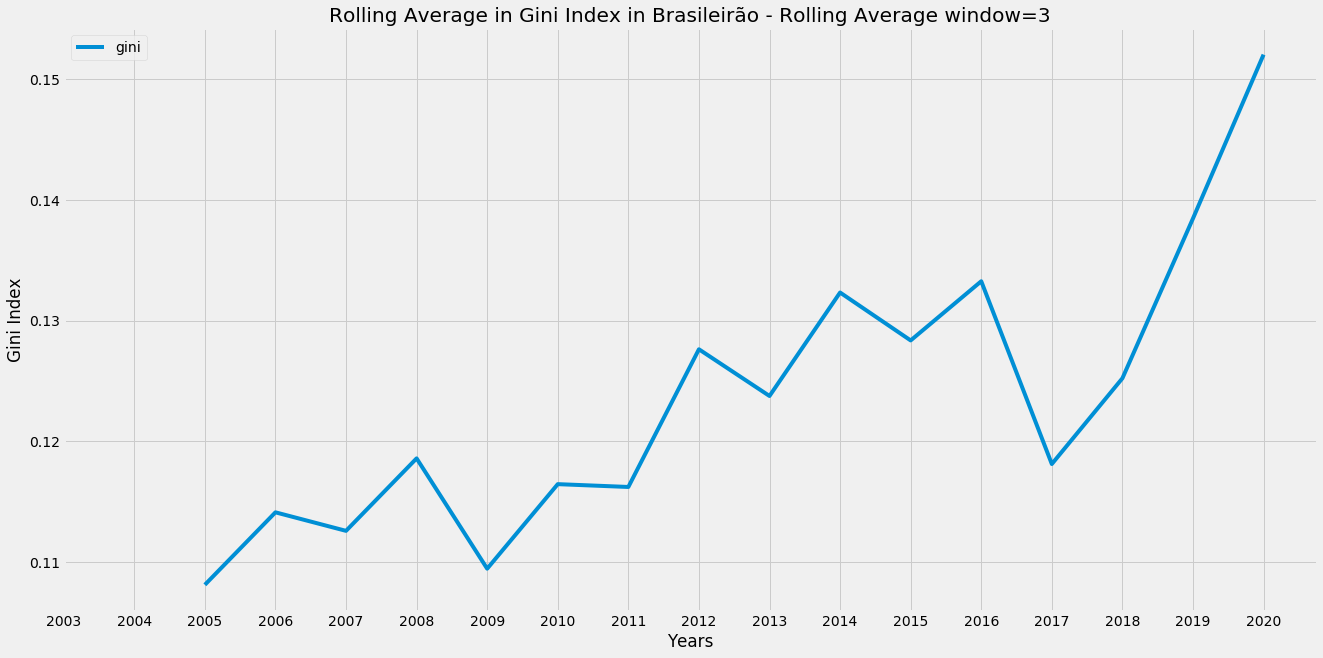

In [9]:
# Some graphs with rolling average
date_range = [2003, 2004, 2005, 2006, 2007,
              2008, 2009, 2010, 2011, 2012,
              2013, 2014, 2015, 2016, 2017,
              2018, 2019, 2020]

def get_graph_ts_rolling_average(ts, title, window, date_range=date_range):
    """Generate graph of a Time Series with a simple rolling average

    Parameters
    ----------
    ts : Pandas Dataframe column
      Dataframe column with a metric to be ploted
    title : Pandas Dataframe
      Graph title to be displayed
    window : int
      Rolling back window to be considered in the average
    date_range : Array
      Array to be used in the ploting. Matplotlib has a 
      very bad way to deal with that, so I need to use this
      workaround to place all years properly
      

    Returns
    -------

    """      
    plt.figure(figsize=(20,10))
    plt.plot(date_range, ts.rolling(window=window, center=False).mean(), label='gini');
    plt.title(f'{title}{window}')
    plt.xlabel('Years')
    plt.ylabel('Gini Index')
    plt.xticks(gini_df.index)
    plt.legend()
    
get_graph_ts_rolling_average(gini_df['gini'],
                             'Rolling Average in Gini Index in Brasileirão - Rolling Average window=',
                             3,
                            )    

Podemos ver que considerando a média movel igual a 3, temos um aumento do ginide quase 3 pontos em 4 anos. 

Aos moldes do post anterior, vamos remover o campeão e o pior time de todas as temporadas e recalcular novamente. 

In [10]:
def get_brasileirao_no_outliers(df):
    """Generate a DF removing the champion and the worst team of the championship

    Parameters
    ----------
    df : Pandas Dataframe
      Dataframe with Brasileirão data
    Returns
    -------
    df_concat : Pandas Dataframe
     Returns a Pandas Dataframe without the outliers

    """    
    
    df_concat = pd.DataFrame()

    for year in df['year'].unique():
        pos_min = df[df['year'] == year]['position'].min()
        pos_max = df[df['year'] == year]['position'].max()

        df_filtered = df[(df['year'] == year) \
                         & (~df['position'].isin([pos_min, pos_max]))]

        df_concat = df_concat.append(df_filtered)
    
    return df_concat


def get_gini(df):   
    """Generate a DF with the year and the following Gini Index calculated

    Parameters
    ----------
    df : Pandas Dataframe
      Dataframe with Brasileirão data
    Returns
    -------
    gini_df : Pandas Dataframe
     Returns a Pandas Dataframe with the year, and gini index    

    """  
    gini_per_year = []
    for year in df['year'].unique():
        championship_index = gini(np.array(df[df['year'] == year]['points']))
        gini_per_year.append((year, round(championship_index, 4)))
        
    gini_df = pd.DataFrame(gini_per_year)
    gini_df.columns = ['year', 'gini']
    
    # Indexing the date field for graph it smoothly
    gini_df.set_index('year', inplace=True)
        
    return gini_df

In [11]:
# Outlier removal
df_brasileirao_no_outliers = get_brasileirao_no_outliers(df_brasileirao)

In [12]:
df_brasileirao_no_outliers_gini = get_gini(df_brasileirao_no_outliers)
df_brasileirao_no_outliers_gini.sort_values(by=['gini'], ascending=False)

,gini
year,
2019,0.1376
2014,0.1217
2020,0.1180
2012,0.1145
2018,0.1139
2010,0.1129
2016,0.1084
2006,0.1029
2004,0.0994


Mesmo removendo o Botafogo (pior time) e o Campeão (Flamengo) **ainda sim o campeonato de 2020 continua o terceiro mais desigual**. 

Vamos gerar o gráfico apenas para verificar se a tendência do aumento da desigualdade permanece ou não.

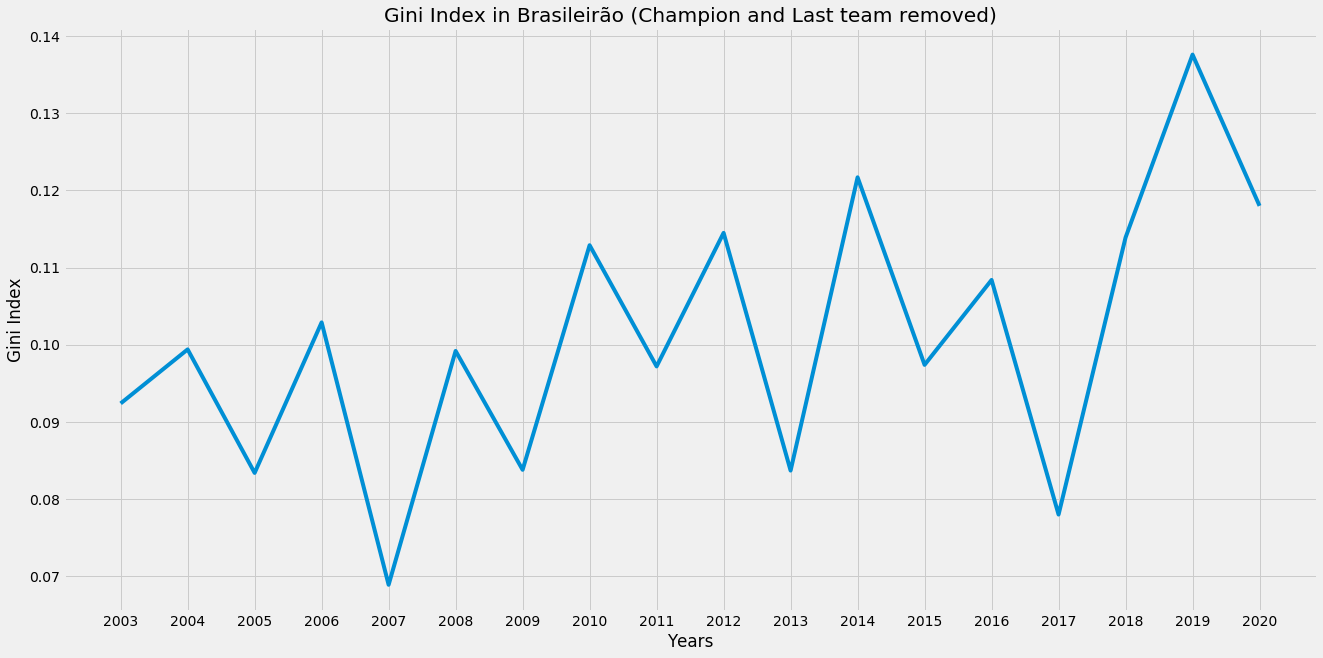

In [13]:
get_graph_ts(df_brasileirao_no_outliers_gini,
             'gini',
             'Gini Index in Brasileirão (Champion and Last team removed)',
             'Gini Index',
            )

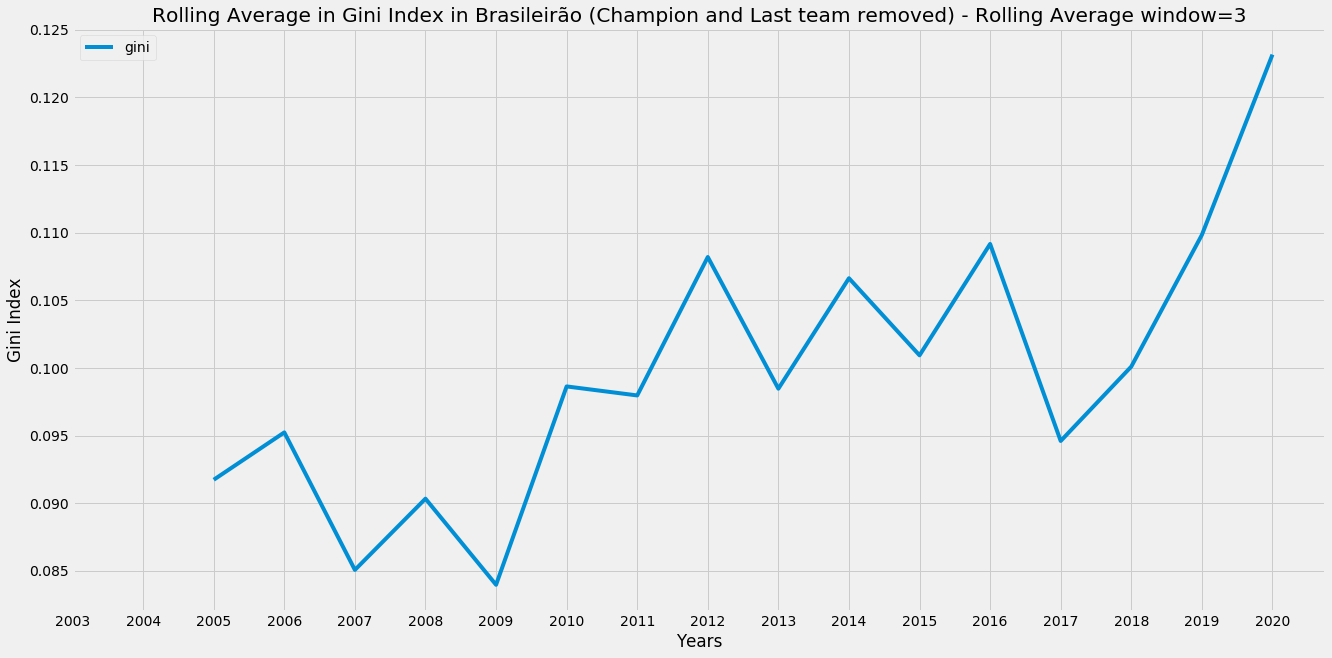

In [14]:
get_graph_ts_rolling_average(df_brasileirao_no_outliers_gini['gini'],
                             'Rolling Average in Gini Index in Brasileirão (Champion and Last team removed) - Rolling Average window=',
                             3,
                            )    

Olhando o Coeficiente de Gini removendo o campeão e o pior time, **podemos ver que ainda temos a tendência de aumento da desigualdade dentro da liga**.


## Conclusão e considerações para o futuro
Se tivermos que responder a nossa pergunta principal que foi "**O brasileirão está ficando mais injusto ao longo do tempo?**" a resposta seria:  


**"Sim. Existe uma esigualdade estrutural no Campeonato Brasileiro com uma tendência de alta, sendo que a edição de 2019 foi a mais desigual de todas e com essa desigualdade sendo sustentada depois do campeonato de 2020."**.  

Aqui eu vou tomar a liberdade de realizar algumas considerações em relação ao que eu penso que pode estar acontecendo no Campeonato:

#### Conclusões de 2019

   - A [disparidade financeira](https://blogdomenon.blogosfera.uol.com.br/2019/08/08/aumenta-a-disparidade-financeira-entre-clubes-brasileiros/) é uma realidade. O Palmeiras que é um dos clubes que mais investem dinheiro têm foi **campeão 2 vezes, vice e 3o colocado**. [O Flamengo que fez investimentos na ordem de mais de 100 milhões de reais](https://globoesporte.globo.com/futebol/times/flamengo/noticia/flamengo-se-aproxima-de-r-200-mi-em-reforcos-no-ano-e-busca-dois-nomes-para-fechar-o-elenco.ghtml) mostrou que **gastar é o nome do jogo**;
   
   - Com essa _race arms_ em relação ao dinheiro e o seu papel na liga, o que vai acontecer **é que os investimentos vão ter que ser certeiros pois o risco de haver frustração de receitas e de títulos é muito grande**, [dado que o campeão ganha em dinheiro o equivalente a apenas 6 meses de salários](https://www.goal.com/br/not%C3%ADcias/brasileirao-2019-veja-a-premiacao-em-dinheiro-que-cada-time/wodfl5qh5cbr1hvme355b4zw8). Ou seja, quem não for campeão corre o risco o real de tomar prejuízos massivos;
   
   - Dado o que foi colocado acima, eu penso que os Supertimes estão para ficar e todos os outros times que vão ficar apenas disputando vagas em competições continentais vão ficar muito mais prudentes nas contratações. Em outras palavras: **Se não for para ser campeão, invista apenas o suficiente para levar o time para algum campeonato em que tenha jogos de mata-mata**, estes sim que aumentam as chances de ser campeão mesmo com elencos não milionários [como o já mostrou o Atlhetico Paranaense que ganhou uma Copa Sulamericana e uma Copa do Brasil em 2 anos](https://brasil.elpais.com/brasil/2019/09/19/deportes/1568908922_220732.html).


#### Conclusões de 2020
   - Como é de conhecimento de todos, o campeonato foi disputado em uma situação extremamente dinâmica por conta da pandemia, o que pode ter um efeito de causal em relação às disparidades citadas acima;

Por inspiração de uma interação que eu tive no Twitter com [Tiago Vinhoza - @tiagotvv](https://twitter.com/tiagotvv/status/1201887496788987905) eu vou coletar os dados das ligas européias desde a década de 90 e analisar se essa desigualdade acontece nas outras ligas do mundo e comparar com a liga Brasileira. 


## Referências e links úteis

[Inequality in the Premier League - Çınar Baymul](https://towardsdatascience.com/inequality-in-the-premier-league-a3a9a7294d96)  

[An Analysis Of Parity Levels In Soccer - Harvard Sports](http://harvardsportsanalysis.org/2017/08/an-analysis-of-parity-levels-in-soccer/)

[Which Sports League has the Most Parity? - Harvard Sports](http://harvardsportsanalysis.org/2016/12/which-sports-league-has-the-most-parity/)

[Major League Soccer and the Effect of Egalitarianism - Harvard Sports]( http://harvardsportsanalysis.org/2015/03/major-league-soccer-and-the-effect-of-egalitarianism-2/)

[The Gini Coefficient as a Measure of League Competitiveness and Title Uncertainty - Australia Sports Betting]( http://www.aussportsbetting.com/2016/06/15/gini-coefficient-competitiveness-uncertainty/)

[Mourão, P. R., & Teixeira, J. S. (2015). Gini playing soccer. Applied Economics, 47(49), 5229-5246](https://www.tandfonline.com/doi/abs/10.1080/00036846.2015.1044650)

[How "fair" are European soccer leagues? Gini index applied to points distribution of 5 soccer leagues between 2000 and 2015 - r/soccer](https://www.reddit.com/r/soccer/comments/3pnjv3/how_fair_are_european_soccer_leagues_gini_index/)

[Footballomics: Estimating League Disparity Performance with a Point-Rank Gini Index - Christoforos Nikolaou](https://rpubs.com/ChristoforosNikolaou/footballomics-02)